In [1]:
# notebook to html
# ! echo jupyter nbconvert --to html --TemplateExporter.exclude_input=True  .\o4_modele_do_symulacji.ipynb

# <b> Inverted pendulum on a cart model derivation

<img src="./fig_ip_diagram.jpg" alt="Alternative text" width="600"/>

In [2]:
from IPython.display import display as disp
from IPython.display import Math as math

import numpy as np
from sympy import symbols, cos, sin
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# sympy.physics : https://stackoverflow.com/questions/25346132/is-it-possible-to-implement-newtons-dot-notation-or-lagranges-prime-notation
# Newtown notation for derivatives (dot notation)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting() 

# Implicitly creates r, d as functions of time
# a, b = dynamicsymbols('r d')    

from sympy import print_latex

from IPython.display import Markdown as md

In [3]:
m, M, gamma, b, g, Jcm, L = symbols('m M gamma b g J_{cm} L')
t = symbols('t')

xw, Fi = symbols('x_{w} F_{i}', cls=smp.Function)
theta = symbols('theta', cls=smp.Function)

d = smp.symbols('d', cls=smp.Symbol)

xw = xw(t)
Fi = Fi(t)
theta = theta(t)

Rx, Ry = symbols('R_x R_y')

Dxw = xw.diff(t, 1)
DDxw = xw.diff(t, 2)

### <b> Forces for a cart
$M\ddot{x} = F_i - F_f - R_x$

In [4]:
# friction force symbol
Ff = smp.symbols('F_f')

In [5]:
lhs = M*DDxw
rhs = Fi - Ff - Rx
f_trolley_eq = smp.Eq(lhs=lhs, rhs=rhs)
disp(f_trolley_eq)

### <b> Center of mass for pendulum arm
$P_{cm} = (x_{cm}, y_{cm})$\
$x_{cm} = x + L\sin(\theta)$\
$y_{cm} = L\cos(\theta)$

In [6]:
xcm = xw+L*sin(theta)
ycm = L*cos(theta)
disp(smp.Eq(lhs=smp.Symbol('x_{cm}'),
            rhs=xcm))
disp(smp.Eq(lhs=smp.Symbol('y_{cm}'),
            rhs=ycm))

### <b> Forces for pendulum arm
$m\ddot{x}_{cm} = R_x + d\cos(\theta)$\
$m\ddot{y}_{cm} = R_y - d\sin(\theta) - mg$


In [7]:
Dxcm = xcm.diff(t, 1)
DDxcm = xcm.diff(t, 2)
DDycm = ycm.diff(t, 2)

Rx_expression = m * DDxcm - d*cos(theta)
Ry_expression = m * DDycm + m*g + d*sin(theta)

disp(smp.Eq(Rx, Rx_expression).doit().expand())
disp(smp.Eq(Ry, Ry_expression).doit().expand())


### <b> Torques for pendulum arm around its center of mass
$J_{cm}\ddot{\theta} = LR_y\sin(\theta) - LR_x\cos(\theta) - \gamma\ddot{\theta} + dL$

In [8]:
Dtheta = theta.diff(t, 1)
DDtheta = theta.diff(t, 2)

lhs = Jcm*DDtheta
rhs = L*Ry*sin(theta) - L*Rx*cos(theta) - gamma*Dtheta + d*L
bilans_momentow = smp.Eq(lhs=lhs, rhs=rhs)
bilans_momentow

1. f_trolley_eq
----------------------------------------------------------------------


2. bilans_momentow
----------------------------------------------------------------------


3. Rx_expression, Ry_expression
----------------------------------------------------------------------


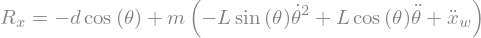

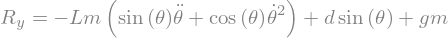

In [9]:
print('1. f_trolley_eq') 
print('----------------------------------------------------------------------')
f_trolley_eq = f_trolley_eq.expand()
disp(f_trolley_eq)
print('2. bilans_momentow')
print('----------------------------------------------------------------------')
bilans_momentow = bilans_momentow.expand()
disp(bilans_momentow)
print('3. Rx_expression, Ry_expression')
print('----------------------------------------------------------------------')
disp(smp.Eq(Rx, Rx_expression))
disp(smp.Eq(Ry, Ry_expression))

In [10]:
f_trolley_eq = f_trolley_eq.subs([(Rx, Rx_expression),
                                  (Ry, Ry_expression)])
disp(f_trolley_eq.expand())
bilans_momentow = bilans_momentow.subs([(Rx, Rx_expression),
                                        (Ry, Ry_expression)])
disp(bilans_momentow.simplify().expand())


### <b> Results

\begin{equation}
    (M + m) \ddot{x}_{w} + Lmcos(\theta)\ddot{\theta} + F_f -Lm\sin(\theta)\dot{\theta}^2 
    -F_i - d\cos(\theta) = 0
\end{equation}

\begin{equation}
    (J_{cm} + mL^2)\ddot{\theta} + mL\cos(\theta)\ddot{x}_{w} + \gamma\dot{\theta} - mgL\sin(\theta)
    + 2Ld = 0
\end{equation}

$$\boldsymbol{F}(\ddot{x}_{w}, \dot{x}_{w}, \ddot{\theta}, \dot{\theta}, \theta, F_i, d) = 0$$
$$F_f = F_f(\dot{x}_{w})$$


\begin{equation}
    \begin{split}
        & M_t = M+m \\
        & J_t = J_{cm} + mL^2 \\
        & J_{cm} = \frac{1}{12} m L^2\\
    \end{split}
\end{equation}

    
\begin{equation}
    \begin{bmatrix}
        M_t & mL\cos(\theta)\\
        mL\cos(\theta) & J_t 
    \end{bmatrix}
    \begin{bmatrix}
        \ddot{x}_{w}\\
        \ddot{\theta}
    \end{bmatrix}
    +
    \begin{bmatrix}
        F_f - Lm\sin(\theta)\dot{\theta}^2\\
        \gamma\dot{\theta} - m g L\sin(\theta)
    \end{bmatrix}
    +
    \begin{bmatrix}
        -F_i\\
        0
    \end{bmatrix}
    +
    \begin{bmatrix}
        -d\cos(\theta)\\
        -2Ld
    \end{bmatrix}
    =
    0
\end{equation}


\begin{equation}
    a_1 a_2 + a_3 + a_4 + a_5 = 0
\end{equation}

\begin{equation}
    \begin{bmatrix}
        \ddot{x}_{\mathrm{w}}\\
        \ddot{\theta}
    \end{bmatrix}
    =
    a_2
    =
    -a_1^{-1}
    \left(
    a_3+a_4+a_5
    \right)
\end{equation}

In [11]:
Mt, Jt, mr, L, g, gamma, d, Ff = smp.symbols('M_t J_t m L g gamma d F_f')
t = smp.symbols('t')
the, xw, Fi = smp.symbols('theta x_w F_i', cls=smp.Function)

the = the(t)
xw = xw(t)
Fi = Fi(t)

Dthe = smp.diff(the, t)
DDthe = smp.diff(the, t, 2)
Dxw = smp.diff(xw, t)
DDxw = smp.diff(xw, t, 2)

In [12]:
# equations
a1 = smp.Matrix([ 
    [Mt, m*L*cos(the)],
    [m*L*cos(the), Jt]
])
a2  = smp.Matrix([
    [DDxw],
    [DDthe]
])
a3 = smp.Matrix([
    [Ff - L*mr*sin(the)*Dthe**2],
    [gamma*Dthe - m*g*L*sin(the)]
]) 
a4 = smp.Matrix([
    [-Fi],
    [0]
])
a5 = smp.Matrix([
    [-d*cos(the)],
    [-2*L*d]
])

# LHS F(...) = 0
F = a1*a2 + a3 + a4 + a5

### <b> Friction models </b>

In [13]:
# Viscous friction
b = smp.symbols('b')
Ff_visc = b*Dxw

# Stribeck friction
uc, us, vs, i = smp.symbols('mu_c mu_s v_s i')
Ff_strib_sign = (uc + (us - uc) * smp.exp(-(Dxw/vs)**2)) * Mt*g * smp.sign(Dxw) + b*Dxw

# stribeck friction, sign(Dx) -> tanh(600*Dx)
uc, us, vs, i = smp.symbols('mu_c mu_s v_s i')
Ff_strib_tanh = (uc + (us - uc) * smp.exp(-(Dxw/vs)**2)) * Mt*g * smp.tanh(600*Dxw) + b*Dxw

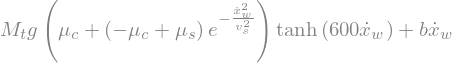

In [14]:
Ff_strib_tanh

### <b> State space representation

In [15]:
DDxw_ss, DDthe_ss = a1.inv() * (-a3 - a4 - a5)
DDxw_ss = DDxw_ss.simplify()
DDthe_ss = DDthe_ss.simplify()

In [16]:
x1, x2, x3, x4 = smp.symbols('x_1 x_2 x_3 x_4', cls=smp.Function)
x1 = x1(t); x2 = x2(t); x3 = x3(t); x4 = x4(t) 

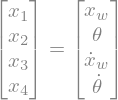

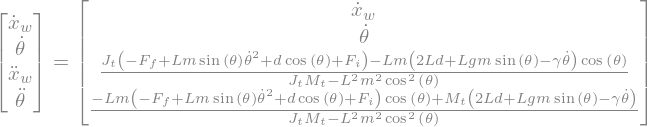

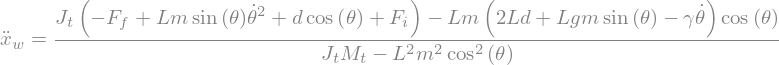

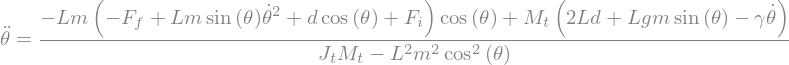

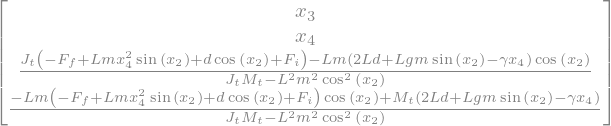

In [17]:
# state vector, x1 x2 x3 x4
state_vec = smp.Matrix([
    [x1],
    [x2],
    [x3],
    [x4]
])
# state vector, x theta ...
state_vec_noraml = smp.Matrix([
    [xw],
    [the],
    [Dxw],
    [Dthe]
])
disp(
    smp.Eq(state_vec, state_vec_noraml)
)
state_vec_diff = state_vec.diff(t)
state_vec_noraml_diff = state_vec_noraml.diff(t)
state_equations_normal = smp.Matrix([
    [Dxw],
    [Dthe],
    [DDxw_ss],
    [DDthe_ss]
])
disp(smp.Eq(
    state_vec_noraml_diff,
    state_equations_normal
))
disp(smp.Eq(
    DDxw, 
    DDxw_ss
))
disp(smp.Eq(
    DDthe,
    DDthe_ss
))
state_equations = state_equations_normal.subs([(Dxw, x3),
                                               (Dthe, x4),
                                               (xw, x1),
                                               (the, x2)])
disp(state_equations)